### PROJECT

# Watsapp_Chat_Analysis

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import sys
sys.path.insert(0,'..')


In [5]:
import re
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [6]:
f = open("WhatsApp Chat with Arjun Pillai.txt", 'r', encoding='utf-8')


In [7]:
data = f.read()

In [8]:
print(data)

5/13/23, 16:25 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
5/20/23, 17:47 - Yash: Hi
5/20/23, 17:47 - Yash: Yeshwant here
5/21/23, 15:03 - Arjun Pillai: Hi Learner,

This is Arjun from Eduonix.
 
A gentle reminder for the session today at 7:30 P.M. to 9:30 P.M.
https://us02web.zoom.us/meeting/register/tZcudOygqzwuGNXBVyWpxPuGvOKBIRoMHJy-

Meeting ID:- 83335857421

Kindly make sure you are saving this number as all the session reminders moving forward will be broadcasted messages & if you do not save my number you would not receive them. 

Best Regards.
5/27/23, 17:30 - Arjun Pillai: Hi Learner,
 
A gentle reminder for the session today at 7:30 P.M. to 9:30 P.M.
https://us02web.zoom.us/meeting/register/tZcudOygqzwuGNXBVyWpxPuGvOKBIRoMHJy-

Meeting ID:- 83335857421

Best Regards.
5/28/23, 16:52 - Arjun Pillai: Hi Learner,
 
A gentle reminder for the session today at 7:30 P.M. to 9:30 P.M.
ht

In [10]:
from datetime import datetime

def StartWithDateAndTime(s):
    print(f"{datetime.now()}: {s}")

In [11]:
def FindAuthor(s):
    s = s.split(" : ")
    if len(s) == 2:
        return True
    else:
        return False

In [12]:
def getDataPoint(line):
    splitline = line.split(" - ")
    dateTime = splitLine[0]
    date, time = dateTime.split(" _ " )
    message = ' '.join(splitMessage[1:])
    if FindAuthor(message):
        splitMessage = message.split(' : ')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date,time,autor,message

In [14]:
with open("WhatsApp Chat with Arjun Pillai.txt", 'r', encoding='utf-8') as f: # open with o 
    # Read the content of the file
    data = f.readlines()

In [15]:
# creat a DataFrame
df = pd.DataFrame(data, columns = [ "chat"])

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   chat    895 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [17]:
df.head(8)


,chat
0,"5/13/23, 16:25 - Messages and calls are end-to..."
1,"5/20/23, 17:47 - Yash: Hi\n"
2,"5/20/23, 17:47 - Yash: Yeshwant here\n"
3,"5/21/23, 15:03 - Arjun Pillai: Hi Learner,\n"
4,\n
5,This is Arjun from Eduonix.\n
6,\n
7,A gentle reminder for the session today at 7:3...


In [20]:
df.shape

(895, 1)

In [21]:
df.tail()


,chat
890,"3/1/24, 19:16 - Arjun Pillai: If there is any ..."
891,"6/22/24, 11:35 - Yash: Hello sir, \n"
892,Yeshwant here \n
893,They sent a msg that test will be @ 6 pm sund...
894,"6/22/24, 11:36 - Yash: So please try to adjust..."


In [22]:
def FindAuthor(s):
    # Split the message to check if it contains an author
    s = s.split(": ")
    if len(s) == 2:
        return True
    else:
        return False

def StartWithDateAndTime(s):
    # Check if the string starts with a date and time format
    pattern = '^[0-9]{1,2}/[0-9]{1,2}/[0-9]{2}, [0-9]{1,2}:[0-9]{2} - '
    result = re.match(pattern, s)
    if result:
        return True
    return False

def getDataPoint(line):
    # Split the line into dateTime and message
    splitLine = line.split(" - ")
    dateTime = splitLine[0]
    date, time = dateTime.split(", ")
    message = ' '.join(splitLine[1:])
    
    if FindAuthor(message):
        splitMessage = message.split(": ")
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

# Read the WhatsApp chat data
with open("WhatsApp Chat with Arjun Pillai.txt", 'r', encoding='utf-8') as f:
    data = f.readlines()

# Initialize lists to store the parsed data
dates = []
times = []
authors = []
messages = []

# Parse each line in the chat data
for line in data:
    if StartWithDateAndTime(line):
        date, time, author, message = getDataPoint(line)
        dates.append(date)
        times.append(time)
        authors.append(author)
        messages.append(message)
    else:
        # If the line does not start with date and time, it's a continuation of the previous message
        messages[-1] += ' ' + line.strip()

# Create a DataFrame to store the parsed data
df = pd.DataFrame({
    "date": dates,
    "time": times,
    "author": authors,
    "message": messages
})

df.tail()

# Save the DataFrame to a CSV file for further analysis
df.to_csv('WhatsApp Chat with Arjun Pillai.csv', index=False)

# Display the first few rows of the DataFrame
print(df.head())

      date   time        author  \
0  5/13/23  16:25          None   
1  5/20/23  17:47          Yash   
2  5/20/23  17:47          Yash   
3  5/21/23  15:03  Arjun Pillai   
4  5/27/23  17:30  Arjun Pillai   

                                             message  
0  Messages and calls are end-to-end encrypted. N...  
1                                               Hi\n  
2                                    Yeshwant here\n  
3  Hi Learner,\n  This is Arjun from Eduonix.  A ...  
4  Hi Learner,\n  A gentle reminder for the sessi...  


In [23]:
author_message_count = df['author'].value_counts()
print(author_message_count)

Arjun Pillai    113
Yash              6
Name: author, dtype: int64


In [24]:
df['date'] = pd.to_datetime(df['date'])
daily_message_count = df.groupby(df['date'].dt.date).size()
print(daily_message_count)

date
2023-05-13    1
2023-05-20    2
2023-05-21    1
2023-05-27    1
2023-05-28    1
             ..
2024-02-18    1
2024-02-24    1
2024-02-25    2
2024-03-01    5
2024-06-22    2
Length: 100, dtype: int64


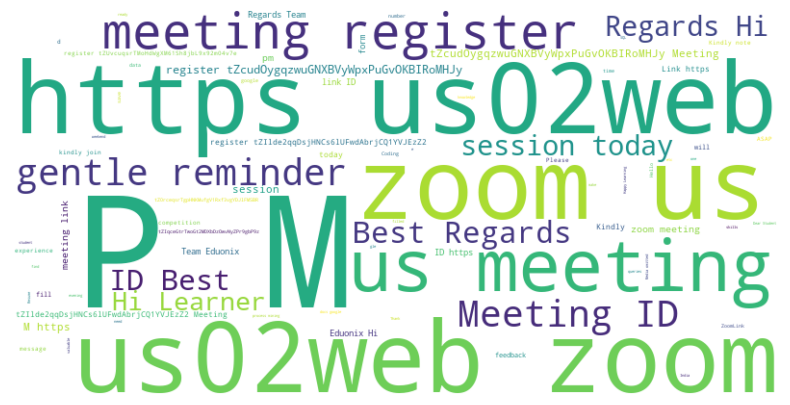

In [25]:
text = ' '.join(df['message'].tolist())
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
# Save the word cloud image
wordcloud.to_file("wordcloud.png")

In [27]:
df['message_length'] = df['message'].apply(len)
print(df[['author', 'message_length']].groupby('author').mean())

              message_length
author                      
Arjun Pillai      206.699115
Yash               42.000000


In [30]:
from textblob import TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [31]:
df['sentiment'] = df['message'].apply(get_sentiment)    #Apply sentiment analyis


In [32]:
print(df[['author', 'sentiment']].groupby('author').mean())    #Display the average sentiment


              sentiment
author                 
Arjun Pillai   0.480591
Yash          -0.020833
